## Regresión lineal


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Regresión lineal simple

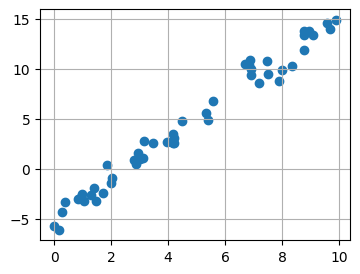

In [39]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)


fig, ax = plt.subplots(figsize = (4,3))
ax.scatter(x, y)
ax.grid(True,'both')
plt.show()

In [25]:
# Dado que x puede recibir una matriz, debemos especificar que se trata de un vector
x = x.reshape((len(x),1))
x[:5]

array([[4.17022005e+00],
       [7.20324493e+00],
       [1.14374817e-03],
       [3.02332573e+00],
       [1.46755891e+00]])

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept= True)

model.fit(x,y)

LinearRegression()

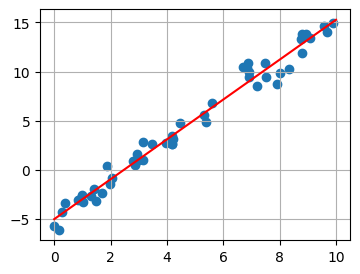

In [38]:
xfit = np.linspace(0,10,1000)
yfit = model.predict(xfit.reshape(len(xfit),1))

fig, ax = plt.subplots(figsize = (4,3))

ax.scatter(x,y)
ax.plot(xfit,yfit, color = 'r')
ax.grid(True, 'both')
plt.show()

In [42]:
print(f'Pendiente del modelo: {model.coef_[0]}')
print(f'Intercepto del modelo: {model.intercept_}')

Pendiente del modelo: 2.0272088103606944
Intercepto del modelo: -4.9985770855532


### Regresión lineal múltiple

In [66]:
X = 10 * rng.rand(100, 2)
y = 0.5 + np.dot(X, [1.5, -2.]) # coeficientes beta

y[:5],X[:5]

(array([ 7.21408981,  0.45479105, -1.93254682,  3.61434239, -9.98205065]),
 array([[6.38278133, 1.4300411 ],
        [8.57738615, 6.45564408],
        [1.15293425, 2.0809741 ],
        [7.45498331, 4.03406628],
        [4.84470061, 8.87455078]]))

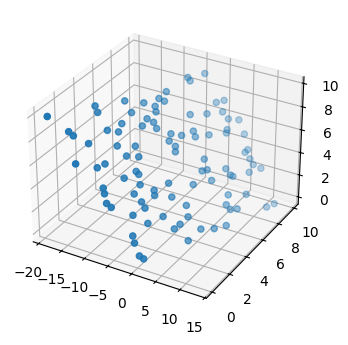

In [67]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(y, X[:, 0], X[:, 1])
plt.show()

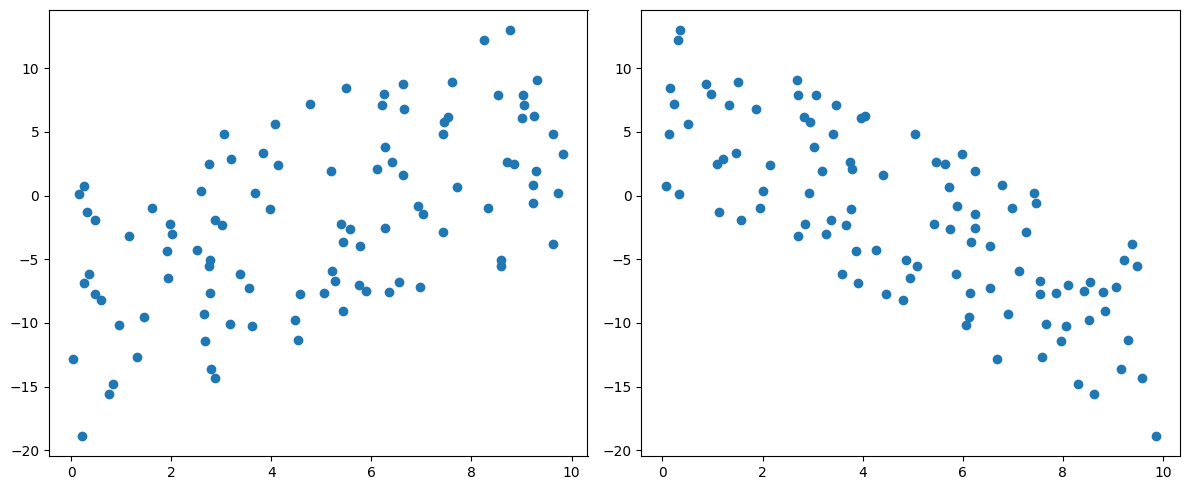

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas

axes[0].scatter(X[:, 0], y)
axes[1].scatter(X[:, 1], y)
plt.tight_layout()
plt.show()

In [69]:
model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.49999999999999645
[ 1.5 -2. ]


## Regresión de la función base

In [63]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

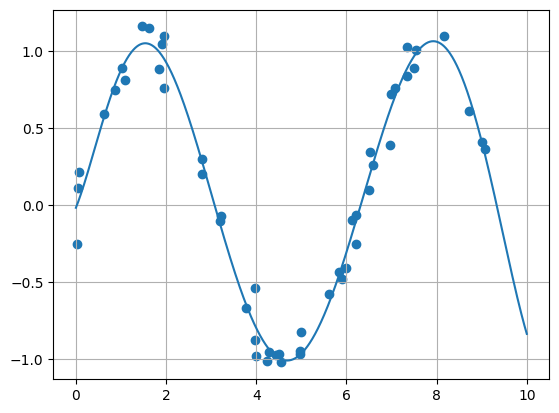

In [65]:
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.grid(True, 'both')
plt.plot(xfit, yfit);

### Ejemplo práctico: precios de casas en Bogotá

Este conjunto de datos contiene información sobre inmuebles en Bogotá, Colombia, incluyendo el tipo de propiedad, descripción, cantidad de habitaciones y baños, área, barrio, UPZ (Unidad de Planeamiento Zonal) y valor. Específicamente, las variables o características incluidas son:

- Tipo: El tipo de propiedad, que puede ser apartamento, casa, oficina, local, lote, bodega, etc.
- Descripción: Una breve descripción del inmueble.
- Habitaciones: La cantidad de habitaciones en el inmueble.
- Baños: La cantidad de baños en el inmueble.
- Área: El tamaño del área en metros cuadrados del inmueble.
- Barrio: El nombre del barrio donde se encuentra el inmueble.
- UPZ: La Unidad de Planeamiento Zonal donde se encuentra el inmueble.
- Valor: El valor del inmueble en pesos colombianos.

Este conjunto de datos podría ser útil para analizar el mercado inmobiliario en Bogotá, explorando los precios y características de diferentes tipos de propiedades en diferentes barrios y zonas de la ciudad. También podría ser útil para desarrollar modelos de predicción de precios o para identificar patrones y tendencias en el mercado inmobiliario.

Fuente: https://www.kaggle.com/datasets/pablobravo73/real-estate-bogota/data

In [272]:
import pandas as pd

url = 'https://raw.githubusercontent.com/julihdez36/Metodos_estadisticos/refs/heads/main/Data%20sets/inmuebles_bogota.csv'

df = pd.read_csv(url)

In [273]:
df.head()

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


In [274]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Baños         9520 non-null   int64 
 4   Área          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


((9520, 8), None)

In [275]:
df.isna().sum()

Tipo             0
Descripcion      0
Habitaciones     0
Baños            0
Área             0
Barrio           0
UPZ             42
Valor            0
dtype: int64

In [276]:
df.dropna(inplace=True)

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9478 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9478 non-null   object
 1   Descripcion   9478 non-null   object
 2   Habitaciones  9478 non-null   int64 
 3   Baños         9478 non-null   int64 
 4   Área          9478 non-null   int64 
 5   Barrio        9478 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9478 non-null   object
dtypes: int64(3), object(5)
memory usage: 666.4+ KB


In [278]:
df["Valor"] = df["Valor"].str.replace(r"[\$,.]", "", regex=True).astype(float)

In [279]:
df.Tipo.value_counts()

Tipo
Apartamento            7294
Casa                   2034
Oficina/Consultorio      60
Local                    38
Edificio                 22
Bodega                   13
Finca                    11
Lote                      6
Name: count, dtype: int64

C:\Users\Julian\AppData\Local\Temp\ipykernel_30220\288199535.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df["Tipo"], palette="viridis")


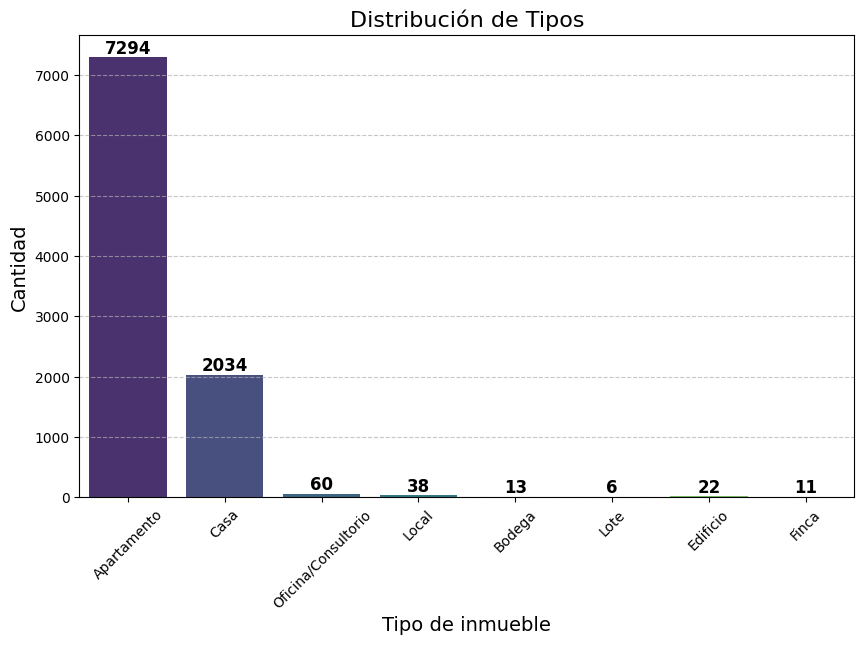

In [280]:

fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.countplot(x=df["Tipo"], palette="viridis")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel("Tipo de inmueble", fontsize=14)
plt.ylabel("Cantidad", fontsize=14)
plt.title("Distribución de Tipos", fontsize=16)
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [281]:
df[df['Área'] == df['Área'].max()]

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
7073,Casa,Casa en venta en Modelia,4,3,166243,Modelia,Fontibón,850000000.00


In [282]:
df[df['Habitaciones'] == df['Habitaciones'].max()]

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
897,Casa,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,480000000.00


In [283]:
df = df[df['Área'] < 10000]
df = df[df['Habitaciones'] < 15]


In [284]:
pd.set_option('display.float_format', '{:.2f}'.format)  

promedios = df.Valor.groupby(df["Tipo"]).mean()
promedios

Tipo
Apartamento            519406658.50
Bodega                 908000000.00
Casa                   823076147.52
Edificio              2343210526.32
Finca                 2410711342.55
Local                 1315703125.00
Lote                  1263333333.33
Oficina/Consultorio    944166898.31
Name: Valor, dtype: float64

C:\Users\Julian\AppData\Local\Temp\ipykernel_30220\1650327700.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=promedios.index, y=promedios.values, palette="viridis")


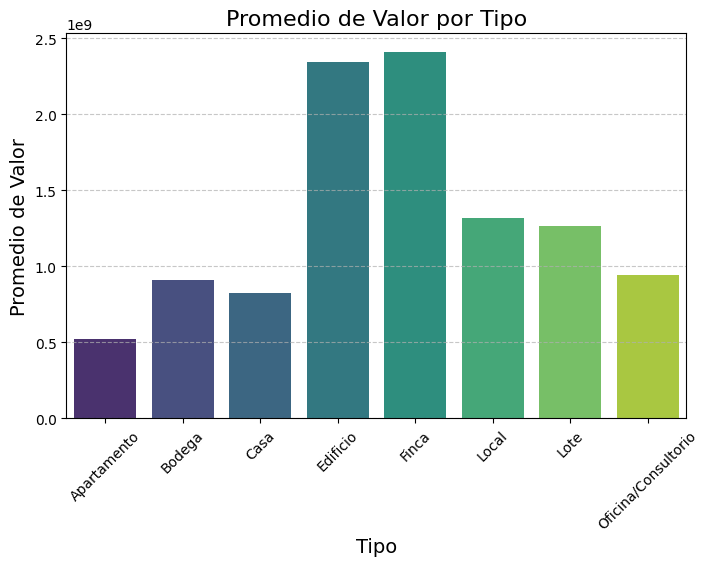

In [285]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=promedios.index, y=promedios.values, palette="viridis")

plt.xlabel("Tipo", fontsize=14)
plt.ylabel("Promedio de Valor", fontsize=14)
plt.title("Promedio de Valor por Tipo", fontsize=16)
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [286]:
# Nos interesa solamente inmuebles para vivienda

df = df[(df['Tipo'] == 'Apartamento') | (df['Tipo'] == 'Casa')]

In [287]:
df.Valor.groupby(df["UPZ"]).mean().sort_values(ascending=False)[:10]

UPZ
La Candelaria                           1415606060.61
CHAPINERO: Chicó Lago + El Refugio      1232619978.10
Lucero                                  1137500000.00
Comuneros                                931666666.67
Casa Blanca Suba                         852500000.00
Ciudad Salitre Oriental                  782465517.24
USAQUÉN: Country Club + Santa Bárbara    744408906.33
CHAPINERO: Pardo Rubio + Chapinero       742545268.05
Los Cedros                               703476000.00
Ciudad Salitre Occidental                697392857.14
Name: Valor, dtype: float64

In [288]:
df.Valor.groupby(df["UPZ"]).median().sort_values(ascending=False)[:10]

UPZ
Lucero                                       1250000000.00
Casa Blanca Suba                              852500000.00
CHAPINERO: Chicó Lago + El Refugio            840000000.00
Comuneros                                     817500000.00
Ciudad Salitre Oriental                       680000000.00
Localidad Usme resto                          632500000.00
ENGATIVÁ: Santa Cecilia + Jardín  Botánico    608556813.00
La Floresta                                   600000000.00
Ciudad Jardín                                 575000000.00
Patio Bonito                                  550000000.00
Name: Valor, dtype: float64

C:\Users\Julian\AppData\Local\Temp\ipykernel_30220\3405946381.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=promedios_area.index, y=promedios_area.values, palette="viridis")


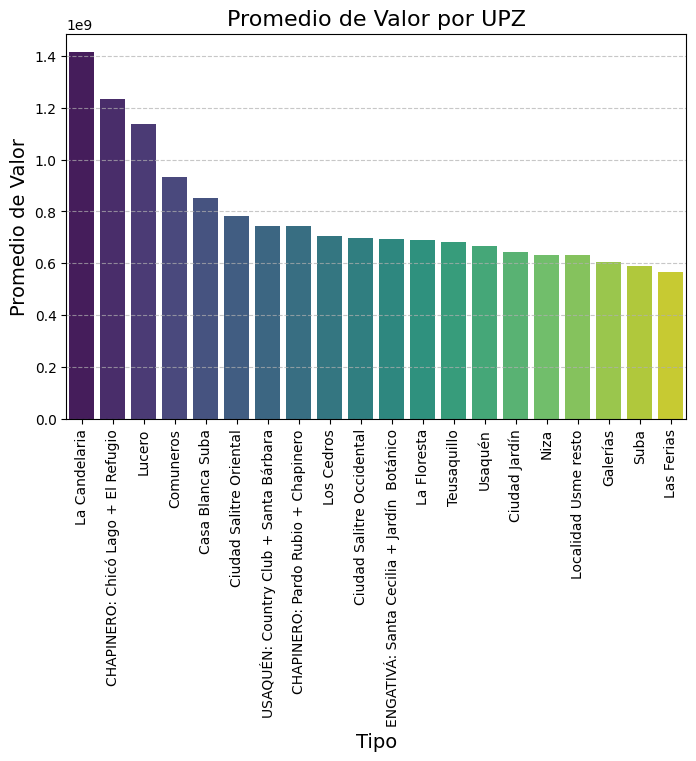

In [289]:
promedios_area = df.Valor.groupby(df["UPZ"]).mean().sort_values(ascending=False)[:20]
promedios_area

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=promedios_area.index, y=promedios_area.values, palette="viridis")

plt.xlabel("Tipo", fontsize=14)
plt.ylabel("Promedio de Valor", fontsize=14)
plt.title("Promedio de Valor por UPZ", fontsize=16)
plt.xticks(rotation=90)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

C:\Users\Julian\AppData\Local\Temp\ipykernel_30220\1961504004.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=promedios_area_desc.index, y=promedios_area_desc.values, palette="viridis")


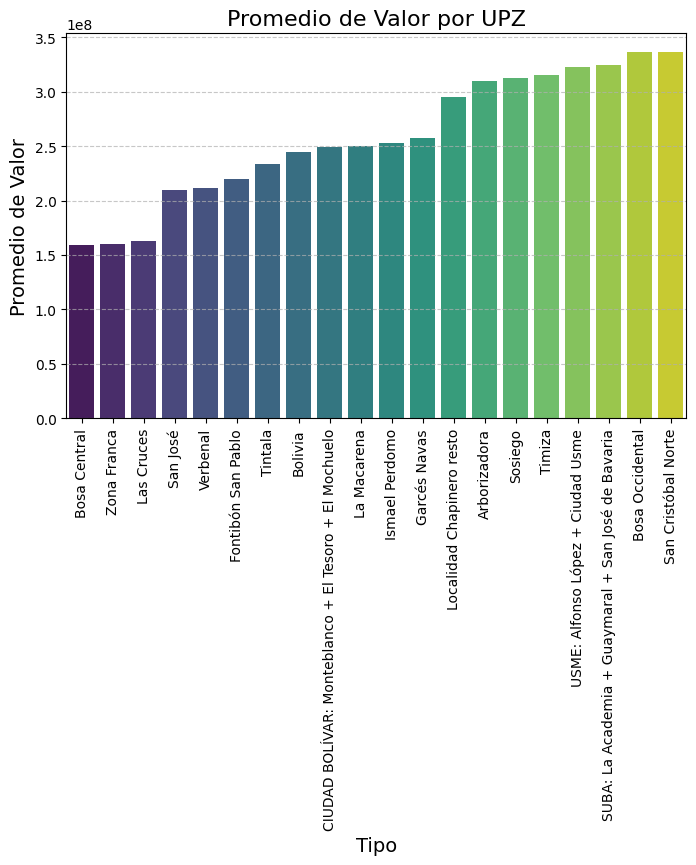

In [290]:
promedios_area_desc = df.Valor.groupby(df["UPZ"]).mean().sort_values(ascending=True)[:20]
promedios_area_desc

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=promedios_area_desc.index, y=promedios_area_desc.values, palette="viridis")

plt.xlabel("Tipo", fontsize=14)
plt.ylabel("Promedio de Valor", fontsize=14)
plt.title("Promedio de Valor por UPZ", fontsize=16)
plt.xticks(rotation=90)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

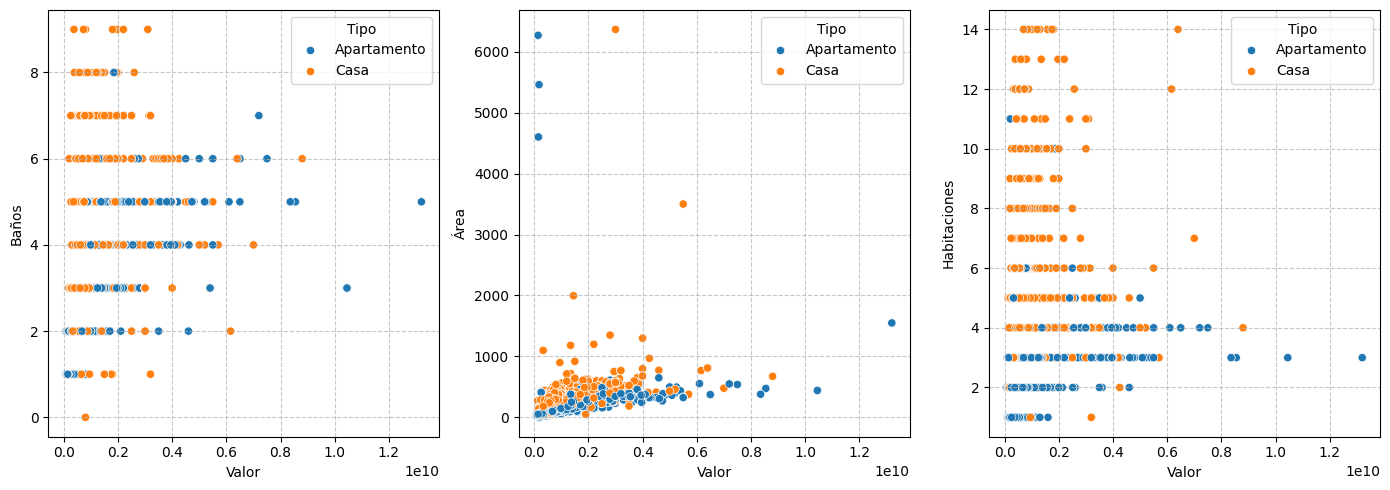

In [291]:
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

sns.scatterplot(x='Valor', y='Baños', data=df, ax=axes[0], hue='Tipo')
sns.scatterplot(x='Valor', y='Área', data=df, ax=axes[1], hue='Tipo')
sns.scatterplot(x='Valor', y='Habitaciones', data=df, ax=axes[2], hue='Tipo')

for ax in axes:
    ax.grid(linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

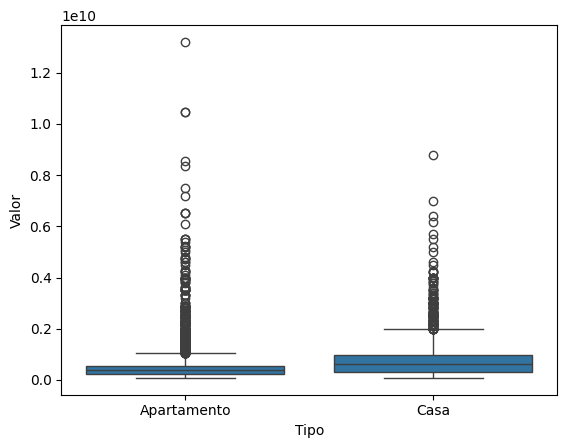

In [292]:
sns.boxplot(data=df, x = 'Tipo', y= 'Valor');

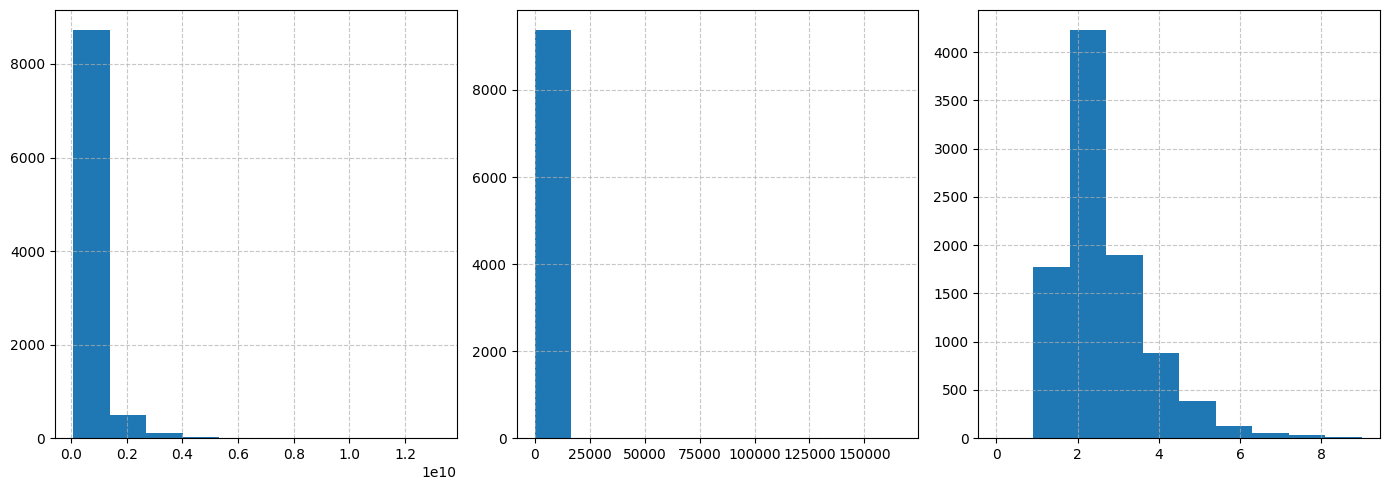

In [294]:
fig, ax = plt.subplots(1,3,figsize = (14,5))

ax[0].hist(df_model['Valor'])
ax[1].hist(df_model['Área'])
ax[2].hist(df_model['Baños'])

for axis in ax:
    axis.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [201]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9370 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tipo          9370 non-null   object 
 1   Descripcion   9370 non-null   object 
 2   Habitaciones  9370 non-null   int64  
 3   Baños         9370 non-null   int64  
 4   Área          9370 non-null   int64  
 5   Barrio        9370 non-null   object 
 6   UPZ           9328 non-null   object 
 7   Valor         9370 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 658.8+ KB


In [ ]:
# Calcular correlaciones
corr_matrix = df.corr()

# Ordenar de mayor a menor correlación con MedHouseVal
corr_target = corr_matrix["MedHouseVal"].sort_values(ascending=False)
print(corr_target)


MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


In [112]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

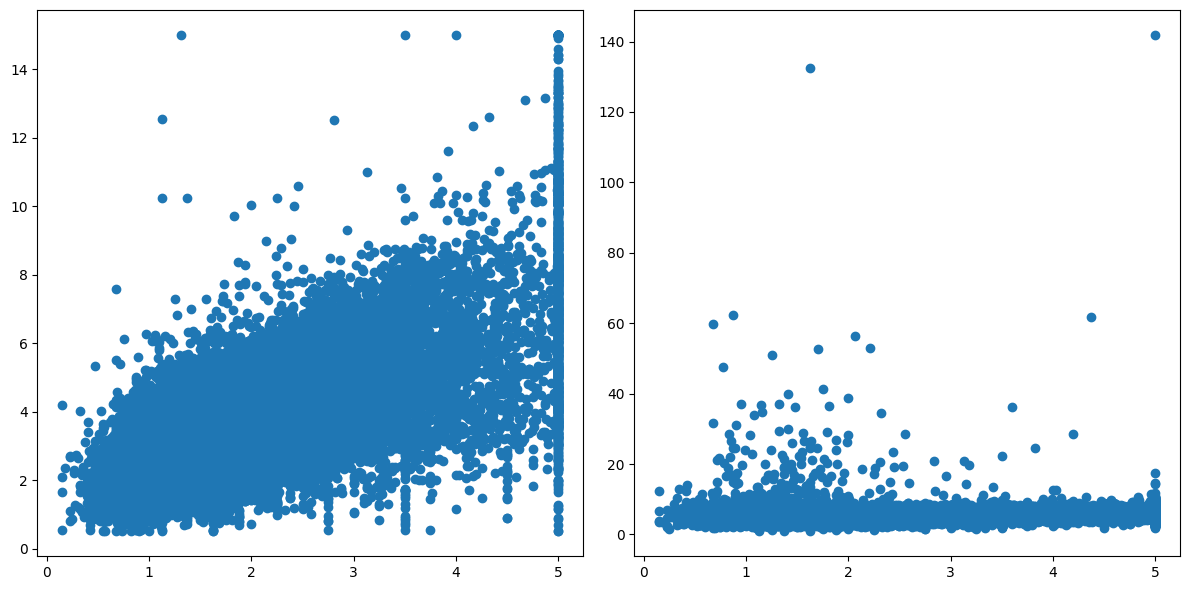

In [115]:
fig, ax = plt.subplots(1,2, figsize = (12,6))

ax[0].scatter(df['MedHouseVal'],df['MedInc'])
ax[1].scatter(df['MedHouseVal'],df['AveRooms'])

plt.tight_layout()
plt.show()


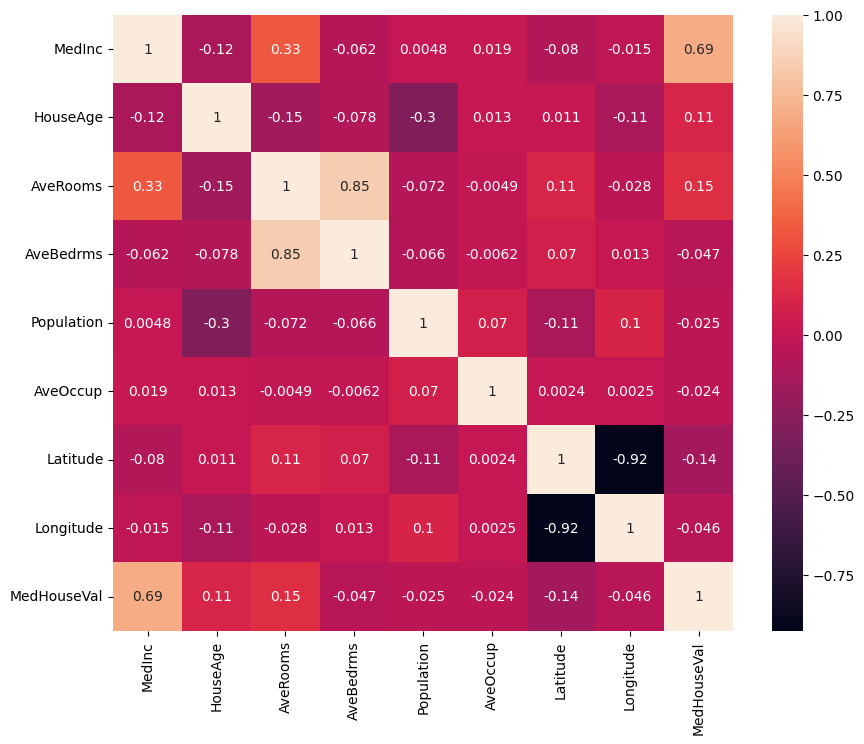

In [105]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True);

In [89]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['MedHouseVal'])  
y = df['MedHouseVal']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [85]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() # creo modelo
model.fit(X_train, y_train) # entreno el modelo
y_pred = model.predict(X_test) # Obtengo predicciones

X_test[:5], y_pred[:5]

(       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 20046  1.6812      25.0  4.192201   1.022284      1392.0  3.877437     36.06   
 3024   2.5313      30.0  5.039384   1.193493      1565.0  2.679795     35.14   
 15663  3.4801      52.0  3.977155   1.185877      1310.0  1.360332     37.80   
 20484  5.7376      17.0  6.163636   1.020202      1705.0  3.444444     34.28   
 9814   3.7250      34.0  5.492991   1.028037      1063.0  2.483645     36.62   
 
        Longitude  
 20046    -119.01  
 3024     -119.46  
 15663    -122.44  
 20484    -118.72  
 9814     -121.93  ,
 array([0.71912284, 1.76401657, 2.70965883, 2.83892593, 2.60465725]))

In [106]:
print(model.intercept_)
print(model.coef_)

2.0719469373788777
[ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]


In [86]:
from sklearn.metrics import mean_squared_error, r2_score

# Métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'R²: {r2:.4f}')


MSE: 0.5559
R²: 0.5758


NameError: name 'reg' is not defined

In [91]:
# Normalización de variables

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo con datos escalados
model.fit(X_train_scaled, y_train)
y_pred_scaled = model.predict(X_test_scaled)

# Evaluar nuevamente
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print(f'MSE con escalado: {mse_scaled:.4f}')
print(f'R² con escalado: {r2_scaled:.4f}')


MSE con escalado: 0.5559
R² con escalado: 0.5758


In [92]:
# Ajuste polinómico

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train_scaled, y_train)

y_pred_poly = poly_model.predict(X_test_scaled)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f'MSE Polinómico: {mse_poly:.4f}')
print(f'R² Polinómico: {r2_poly:.4f}')


MSE Polinómico: 0.4643
R² Polinómico: 0.6457
